# Module 1: Data Wrangling with Python
## Sprint 3: Data Visualization with Python
## Part 5: Coursera Course Analysis


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will need to use all that you learned in this and previous Sprints.
As the final assignment of this Sprint, you will analyse the Coursera Course Dataset.
You will have to apply all that you have learned about Data Visualization & Data Analysis to complete this task.
You'll notice that in this project you have fewer explicitly stated requirements.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

## Objectives for this Part

- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using Pandas.

## Requirements

- Download the data from [Coursera Course Dataset](https://www.kaggle.com/siddharthm1698/coursera-course-dataset).
- Load the data using Pandas.
- Perform data cleaning.
- Perform exploratory data analysis.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What is the difference between continuous and discrete distributions?
- What is a Bernoulli trial?
- What is a Standard Normal Distribution?
- What is a random variable?
- Explain the Bayes's Theorem
- Explain the Simpson's paradox


## Env preperation

In [1]:
! pip install -q kaggle

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
! kaggle datasets download -d siddharthm1698/coursera-course-dataset
! unzip coursera-course-dataset.zip

In [ ]:
! ls

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

## Data inspection and cleaning

In [4]:
course = pd.read_csv('coursea_data.csv', index_col='Unnamed: 0')
course = course.sort_index()

In [5]:
course.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


In [6]:
course.isna().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

`course_students_enrolled` seems to be a `string` in either thousands or milions. Will change it to `float` of students enrolled in thousands.



In [7]:
course['course_students_enrolled'].apply(lambda x: x[-1]).unique()

array(['k', 'm'], dtype=object)

In [5]:
def parse_students(row):
  if row[-1] == 'm':
    return pd.to_numeric(row[:-1]) * 1000
  else:
    return pd.to_numeric(row[:-1])


course['course_students_enrolled'] = course['course_students_enrolled'].apply(parse_students)

In [14]:
course.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500.0
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350.0


Set `course_difficulty` and `course_Certificate_type` to ordered categries to ease plotting

In [6]:
course['course_difficulty'] = pd.Categorical(course['course_difficulty'], 
                                             categories=['Beginner', 'Intermediate', 'Advanced', 'Mixed'],
                                             ordered=True)

course['course_Certificate_type'] = pd.Categorical(course['course_Certificate_type'], 
                                                   categories=['COURSE', 'SPECIALIZATION', 'PROFESSIONAL CERTIFICATE'],
                                                   ordered=True)

In [21]:
course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   course_title              891 non-null    object  
 1   course_organization       891 non-null    object  
 2   course_Certificate_type   891 non-null    category
 3   course_rating             891 non-null    float64 
 4   course_difficulty         891 non-null    category
 5   course_students_enrolled  891 non-null    float64 
dtypes: category(2), float64(2), object(2)
memory usage: 36.8+ KB


There seems to be 3 courses with duplicated titles, but they are either from different organizations or have different certification types

In [22]:
course['course_title'].str.strip().str.lower().value_counts().head()

machine learning                      2
marketing digital                     2
developing your musicianship          2
introduction to dental medicine       1
private equity and venture capital    1
Name: course_title, dtype: int64

In [23]:
course.loc[course['course_title'].isin(['Developing Your Musicianship', 'Machine Learning', 'Marketing Digital'])]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290.0
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54.0
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81.0
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39.0
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41.0


There are 10 values further than 3 std from the mean, all are in the top end and make up 16% of total students enrolled.  
Top courses are focused on data science and programming skills.

In [24]:
def get_outliers(df, col_name, std):
  col = df[col_name]
  zscore = (col - col.mean()) / col.std()
  zmask = (zscore > -std) & (zscore < std)
  outliers = df.loc[~zmask].sort_values(col_name, ascending=False).reset_index()
  return outliers, zmask

In [25]:
stud_outliers, mask = get_outliers(course, 'course_students_enrolled', 3)
stud_outliers

,index,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0
1,2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500.0
2,3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500.0
3,47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300.0
4,13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830.0
5,44,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790.0
6,175,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760.0
7,40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750.0
8,15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740.0
9,5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690.0


In [26]:
top_sum = stud_outliers['course_students_enrolled'].sum()
all_sum = course['course_students_enrolled'].sum()
print(top_sum / all_sum)

0.1618702583850901


In [8]:
import re
prog_words = 'Python|AI|machine learning|deep learning|data science|algorithm|java|javascript'
course.loc[course['course_title'].str.contains(prog_words, flags=re.IGNORECASE, regex=True)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500.0
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690.0
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0
...,...,...,...,...,...,...
869,Python Classes and Inheritance,University of Michigan,COURSE,4.7,Intermediate,21.0
873,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33.0
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130.0
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6


And 7 values of ratings more 3 std away from the mean, all in the bottom end.

In [27]:
rating_outliers, mask = get_outliers(course, 'course_rating', 3)
rating_outliers

,index,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,609,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34.0
1,659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13.0
2,873,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33.0
3,178,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15.0
4,779,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76.0
5,352,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29.0
6,767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140.0


I will not remove these values because they don't seem like errors but are a natural part of the dataset

## EDA

Courses are very well rated in general, 75% of them are rated over 4.6.  
75% of the courses also have less tham 100k enrolled students, but there are some big outliers

In [86]:
course.describe()

,course_rating,course_students_enrolled
count,891.000000,891.000000
mean,4.677329,90.552076
std,0.162225,181.936454
min,3.300000,1.500000
25%,4.600000,17.500000
50%,4.700000,42.000000
75%,4.800000,99.500000
max,5.000000,3200.000000


Similar trends could be seen when grouping the data by `course_dificulty`.  
Mixed difficulty courses seem to have a bit more students.

In [28]:
course.groupby('course_difficulty').describe()

course_rating                      ... course_students_enrolled                
                          count      mean       std  ...                      50%     75%     max
course_difficulty                                    ...                                         
Beginner                  487.0  4.680903  0.141947  ...                     37.0   98.50  1500.0
Intermediate              198.0  4.646465  0.188939  ...                     37.0   79.75   690.0
Advanced                   19.0  4.600000  0.194365  ...                     39.0   64.00   320.0
Mixed                     187.0  4.708556  0.170803  ...                     62.0  120.00  3200.0

[4 rows x 16 columns]

Top and bottom course organizors by mean `course_students_enrolled`

In [95]:
course.groupby('course_organization').describe().sort_values(('course_students_enrolled', 'mean'), ascending=False).fillna(0).head(10)

course_rating  ... course_students_enrolled
                                                     count  ...                      max
course_organization                                         ...                         
Stanford University                                   16.0  ...                   3200.0
Yale University                                       17.0  ...                   2500.0
McMaster University                                    1.0  ...                    230.0
Google - Spectrum Sharing                              1.0  ...                    210.0
Ludwig-Maximilians-Universität München (LMU)           2.0  ...                    350.0
École Polytechnique                                    1.0  ...                    190.0
University of Michigan                                41.0  ...                   1500.0
Georgia Institute of Technology                       10.0  ...                    610.0
deeplearning.ai                                       16.0  ...                    690.0
University of Washington                               5.0  ...                    290.0

[10 rows x 16 columns]

In [98]:
course.groupby('course_organization').describe().sort_values(('course_students_enrolled', 'mean')).fillna(0).head(10)

course_rating  ... course_students_enrolled
                                                           count  ...                      max
course_organization                                               ...                         
Automation Anywhere                                          1.0  ...                      2.2
Peter the Great St. Petersburg Polytechnic Univ...           1.0  ...                      2.4
(ISC)²                                                       3.0  ...                      5.3
University of New Mexico                                     1.0  ...                      5.5
ESCP Business School                                         1.0  ...                      6.5
UCL School of Management                                     1.0  ...                      7.8
Novosibirsk State University                                 1.0  ...                      8.2
Institute for the Future                                     2.0  ...                      9.4
Crece con Google                                             1.0  ...                      8.8
New York Institute of Finance                                2.0  ...                     13.0

[10 rows x 16 columns]

Most courses are for beginers and aren't specializations or profesional certificates

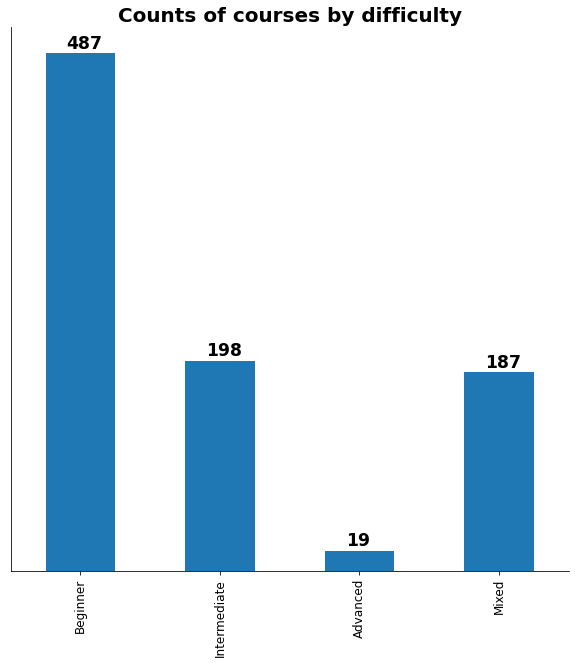

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

new_idx = ['Beginner', 'Intermediate', 'Advanced', 'Mixed']
dat = course['course_difficulty'].value_counts().reindex(new_idx)
dat.plot.bar(ax=ax, fontsize=12)

ax.set_title('Counts of courses by difficulty', fontsize=20, fontweight='bold')
ax.grid(False)
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

for n, idx in enumerate(dat.index):
    plt.text(n-0.099, dat[idx]+5, str(dat[idx]), fontsize='xx-large', fontweight='semibold')

In [31]:
bar_dat = course.groupby('course_difficulty')['course_Certificate_type'].value_counts().unstack().fillna(0)
bar_dat = bar_dat.reindex(new_idx)
bar_dat

course_Certificate_type,COURSE,SPECIALIZATION,PROFESSIONAL CERTIFICATE
course_difficulty,,,
Beginner,282.0,196.0,9.0
Intermediate,104.0,91.0,3.0
Advanced,9.0,10.0,0.0
Mixed,187.0,0.0,0.0


Most people are also enroled into begginer courses, although on average most study mixed difficulty courses, mixed difficulty also has the courses with the most people.

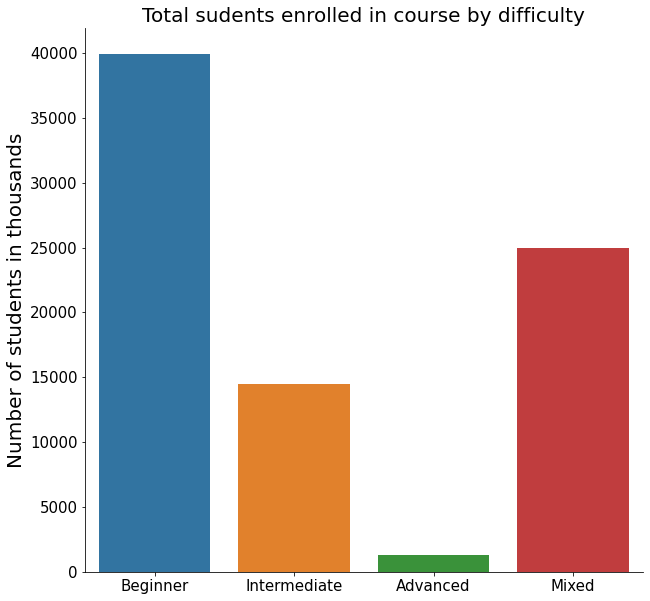

In [55]:
dat = course.groupby(['course_difficulty']).agg(sum)
new_idx = ['Beginner', 'Intermediate', 'Advanced', 'Mixed']
dat = dat.reindex(new_idx)

fig, ax = plt.subplots(figsize=(10, 10))
g = sns.barplot(x=dat.index, y='course_students_enrolled', data=dat)

g.set_title('Total sudents enrolled in course by difficulty', fontsize=20)
g.set_ylabel('Number of students in thousands', fontsize=20)
g.set_xlabel('')
g.set_xticklabels(labels=g.get_xticklabels(), fontsize=15)
plt.setp(g.get_yticklabels(), fontsize=15)
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

In [33]:
course.loc[course['course_difficulty'] == 'Mixed'].sort_values('course_students_enrolled', ascending=False).head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300.0
175,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760.0
40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750.0


Students enrolled in course based on course difficulty

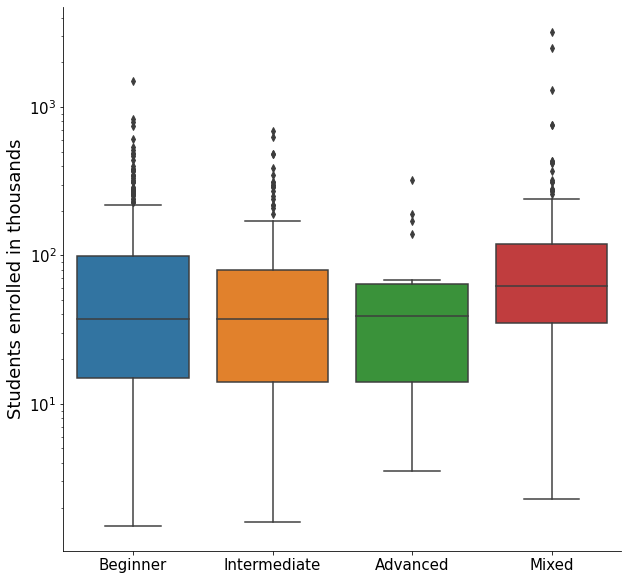

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=course, x='course_difficulty', y='course_students_enrolled')

ax.set_yscale('log')
ax.set_ylabel('Students enrolled in thousands', fontsize=18)
ax.set_xlabel('')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Number of students enrolled by difficulty and certificate type

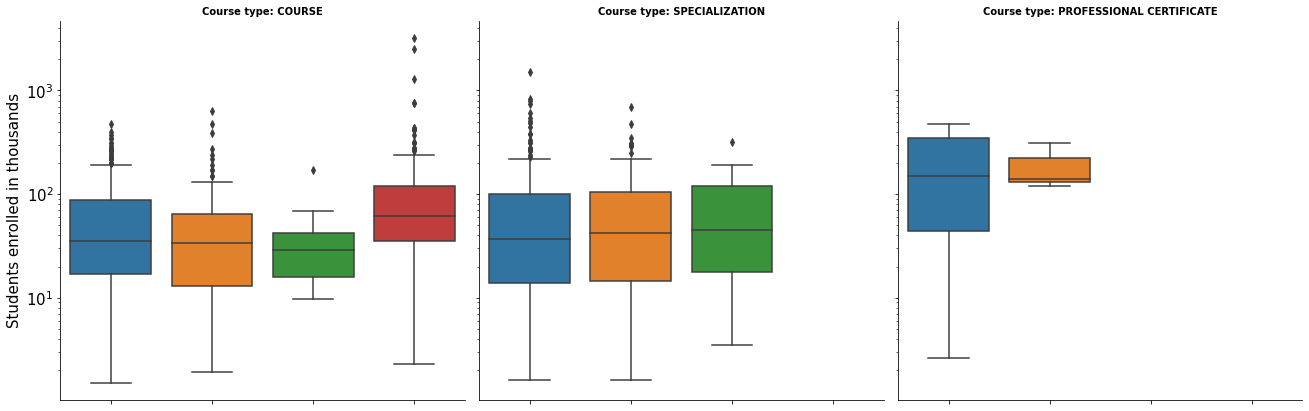

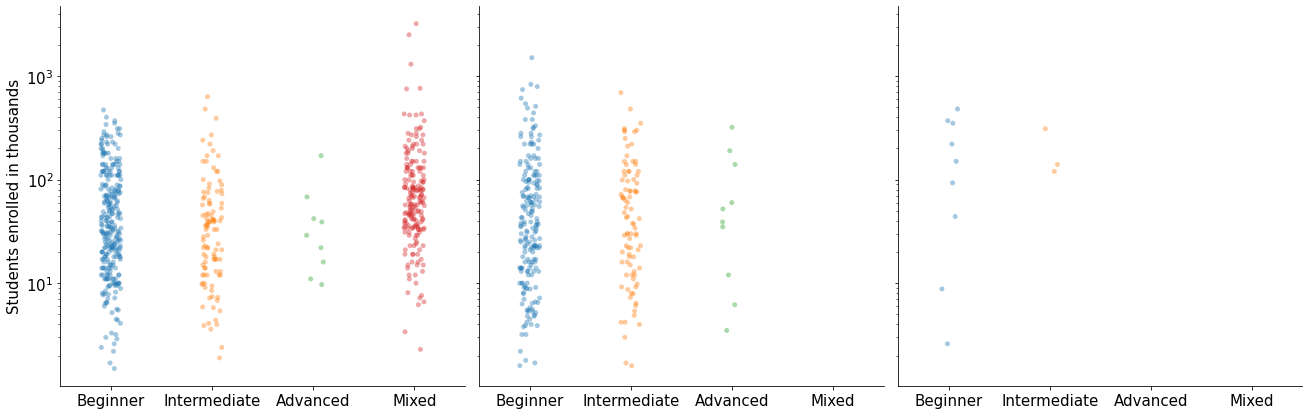

In [85]:
p = sns.catplot(kind='box', data=course, x='course_difficulty', y='course_students_enrolled', 
                col='course_Certificate_type', height=6, aspect=1)
p.set(yscale='log')
p.set_titles('Course type: {col_name}', fontweight='semibold')
p.set_xlabels('')
p.set_xticklabels('', fontsize=15)
p.set_ylabels('Students enrolled in thousands', fontsize=15)

for axi in p.axes[0]:
  plt.setp(axi.get_xticklabels(), fontsize=15)
  plt.setp(axi.get_yticklabels(), fontsize=15)

g = sns.catplot(kind='strip', data=course, x='course_difficulty', y='course_students_enrolled', 
                col='course_Certificate_type', alpha=0.4, height=6, aspect=1)
g.set(yscale='log')
g.set_xlabels('')
g.set_ylabels('Students enrolled in thousands', fontsize=15)
g.set_titles('')

for axi in g.axes[0]:
  plt.setp(axi.get_xticklabels(), fontsize=15)
  plt.setp(axi.get_yticklabels(), fontsize=15)

Worse rated and best rated courses.  
New York based courses don't look great

In [173]:
course.loc[course['course_rating'] <= 4.0].sort_values('course_rating')

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140.0
352,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29.0
178,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15.0
779,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76.0
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13.0
873,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33.0


In [101]:
course.loc[course['course_rating'] >= 4.9].sort_values('course_rating', ascending=False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6
587,The Horse Course: Introduction to Basic Care a...,University of Florida,COURSE,4.9,Mixed,29.0
645,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9.5
638,Unraveling the Cycling City,University of Amsterdam,COURSE,4.9,Intermediate,3.9
...,...,...,...,...,...,...
386,Revisão Sistemática e Meta-análise,Universidade Estadual de Campinas,COURSE,4.9,Intermediate,17.0
395,Build a Modern Computer from First Principles:...,Hebrew University of Jerusalem,COURSE,4.9,Mixed,95.0
414,Rethinking International Tax Law,Universiteit Leiden,COURSE,4.9,Mixed,36.0
421,Introduction to Classical Music,Yale University,COURSE,4.9,Mixed,150.0


Courses with least and most students enrolled

In [103]:
course.loc[course['course_students_enrolled'] <= 4].sort_values('course_students_enrolled').reset_index()

,index,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5
1,401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6
2,462,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1.6
3,856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1.7
4,826,The Pronunciation of American English,"University of California, Irvine",SPECIALIZATION,4.6,Beginner,1.7
5,373,Healthcare Law,University of Pennsylvania,SPECIALIZATION,4.7,Intermediate,1.7
6,693,Esports,"University of California, Irvine",SPECIALIZATION,4.5,Beginner,1.8
7,751,Blended Language Learning: Design and Practice...,University of Colorado Boulder,COURSE,4.8,Intermediate,1.9
8,447,International Security Management,Erasmus University Rotterdam,COURSE,4.5,Beginner,2.2
9,640,Implementing RPA with Cognitive Automation and...,Automation Anywhere,SPECIALIZATION,4.6,Beginner,2.2


Enrollement into the courses based on course rating

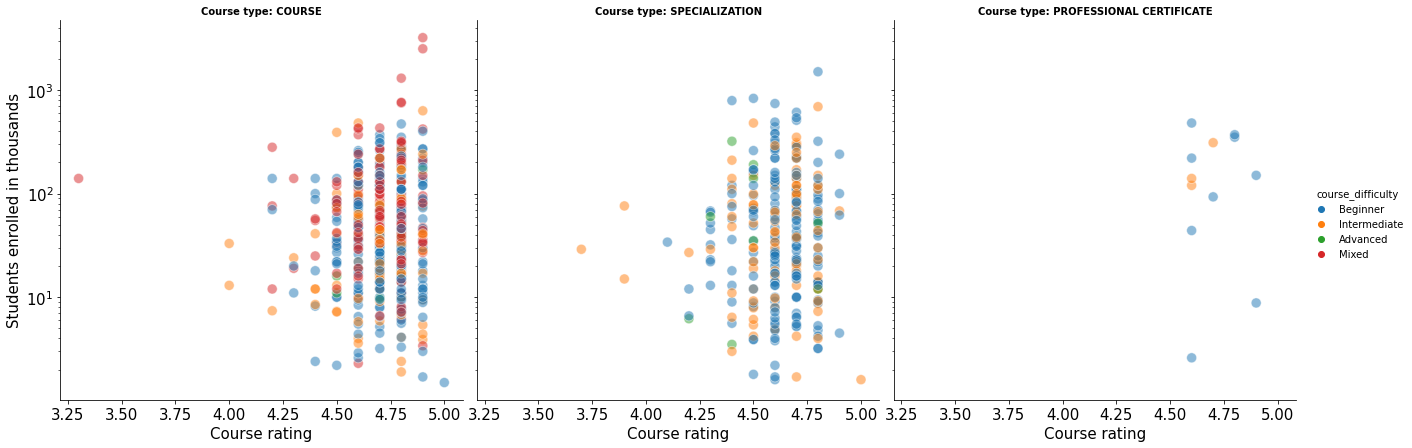

In [124]:
g = sns.relplot(x='course_rating', y='course_students_enrolled', data=course, 
                hue='course_difficulty', col='course_Certificate_type',
                s=100, alpha=0.5, height=6, aspect=1)
g.set_xlabels('Course rating', fontsize=15)
g.set(yscale='log')
g.set_ylabels('Students enrolled in thousands', fontsize=15)
g.set_titles('Course type: {col_name}', fontweight='semibold')

for axi in g.axes[0]:
  plt.setp(axi.get_xticklabels(), fontsize=15)
  plt.setp(axi.get_yticklabels(), fontsize=15)

In top courses by difficulty programing again wins, Intermediate courses are only for programming

In [100]:
def get_top(group):
  return group.sort_values('course_students_enrolled', ascending=False).head()

top_groups = course.groupby('course_difficulty').apply(get_top)
top_groups

course_title  ... course_students_enrolled
course_difficulty                                                         ...                         
Beginner          3                                 Python for Everybody  ...                   1500.0
                  13                                        Data Science  ...                    830.0
                  44                                      Career Success  ...                    790.0
                  15                   Data Science: Foundations using R  ...                    740.0
                  36           Improve Your English Communication Skills  ...                    610.0
Intermediate      5                                        Deep Learning  ...                    690.0
                  62                   Neural Networks and Deep Learning  ...                    630.0
                  26                    Applied Data Science with Python  ...                    480.0
                  317                                      R Programming  ...                    480.0
                  187             Introduction to Data Science in Python  ...                    390.0
Advanced          157                     Advanced Data Science with IBM  ...                    320.0
                  103                          Advanced Machine Learning  ...                    190.0
                  214                               Medical Neuroscience  ...                    170.0
                  288         Data Warehousing for Business Intelligence  ...                    140.0
                  683   Probabilistic Graphical Models 1: Representation  ...                     68.0
Mixed             6                                     Machine Learning  ...                   3200.0
                  2                            The Science of Well-Being  ...                   2500.0
                  47   Programming for Everybody (Getting Started wit...  ...                   1300.0
                  175                     English for Career Development  ...                    760.0
                  40   Successful Negotiation: Essential Strategies a...  ...                    750.0

[20 rows x 6 columns]